In [1]:
import numpy as np
import sys
sys.path.append('..')
from utils.util import *
from utils.all_plots import *

In [1]:
args_dict = {}
args_dict['analyze_names'] = ['calc_ratio', 'analyze_accs']

args_dict = set_args_dict(args_dict)

all_res = read_results(args_dict)

NameError: name 'set_args_dict' is not defined

In [4]:
figx, figy = 12, 6
args_dict['mi'], args_dict['mx'] = 0.5, 6.5
args_dict['sub_title'], args_dict['threshold'] = '', 1
args_dict['val_name']='Ratio(cong/incong)'
args_dict['savefig_str'], args_dict['analyze_name'] = 'ratio_results', ''
args_dict['is_box_plot'], args_dict['is_accs_plot'] = False, True

# RNN

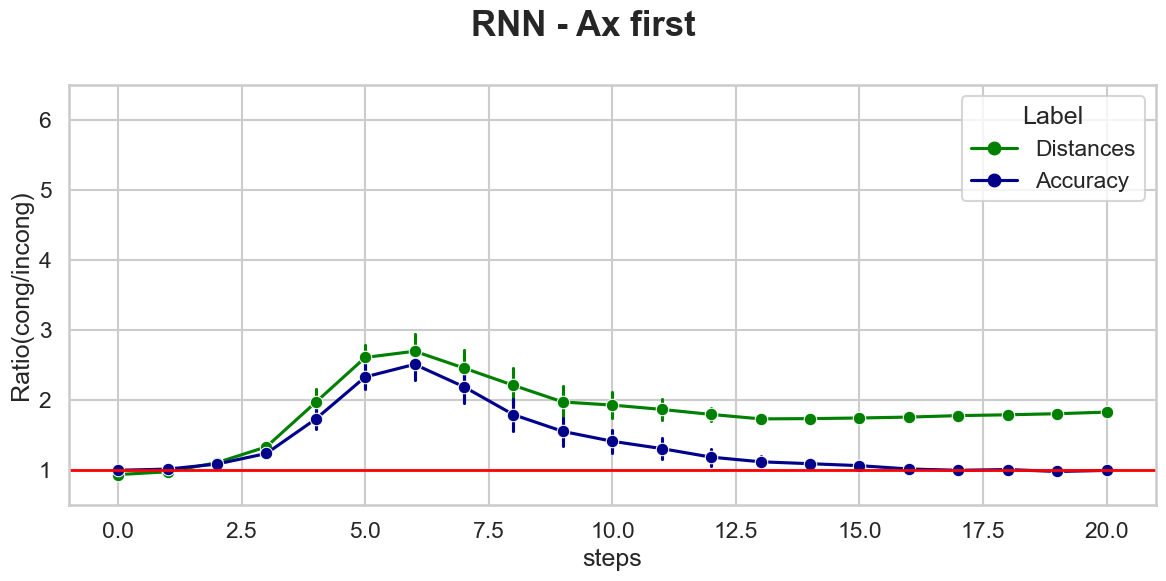

In [5]:
r_res = all_res['ratio_hidds_rnn_ctxF']
acc_res = all_res['rnn_acc_runs_ctxF']

args_dict['Label']='Distances'
df_r = res_to_df(args_dict, r_res)

args_dict['Label']='Accuracy'
a_c_tr, a_inc_tr, _, _, _, _ = get_accs(acc_res)
r_tr = a_c_tr / a_inc_tr # ration of accs
df_r_a_tr = res_to_df(args_dict, r_tr)
dfs = df_r, df_r_a_tr

# plot params
args_dict['ctx_order'], args_dict['ctx_order_str'] = 'first', 'ctxF'
args_dict['model_str'], args_dict['mfig_str'] = 'RNN', 'rnn'

# plot
fig, ax = plt.subplots(figsize=(figx,figy))
boxplot_ratio_accs(dfs, args_dict, fig, ax)

# only plot the boxplot

# fig, ax = plt.subplots(figsize=(figx,figy))
# boxplot(df_r, args_dict, fig, ax)

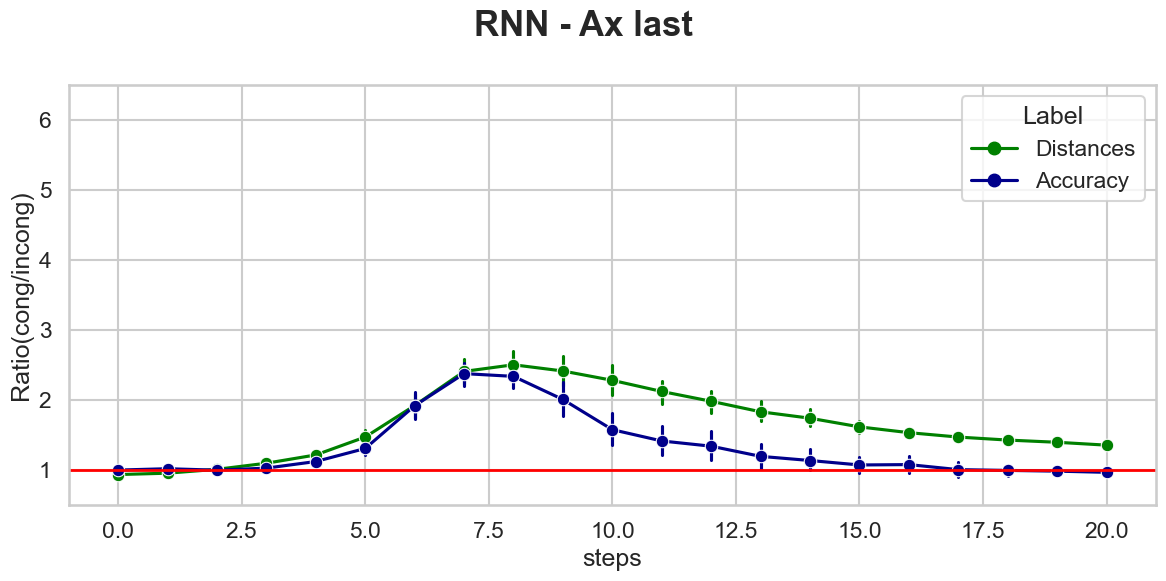

In [6]:
r_res = all_res['ratio_hidds_rnn_ctxL']
acc_res = all_res['rnn_acc_runs_ctxL']

args_dict['Label']='Distances'
df_r = res_to_df(args_dict, r_res)

args_dict['Label']='Accuracy'
a_c_tr, a_inc_tr, _, _, _, _ = get_accs(acc_res)
r_tr = a_c_tr / a_inc_tr # ration of accs
df_r_a_tr = res_to_df(args_dict, r_tr)
dfs = df_r, df_r_a_tr

# plot params
args_dict['ctx_order'], args_dict['ctx_order_str'] = 'last', 'ctxL'
args_dict['model_str'], args_dict['mfig_str'] = 'RNN', 'rnn'

# plot
fig, ax = plt.subplots(figsize=(figx,figy))
boxplot_ratio_accs(dfs, args_dict, fig, ax)

# only plot the boxplot

# fig, ax = plt.subplots(figsize=(figx,figy))
# boxplot(df_r, args_dict, fig, ax)

# Lesioned RNN

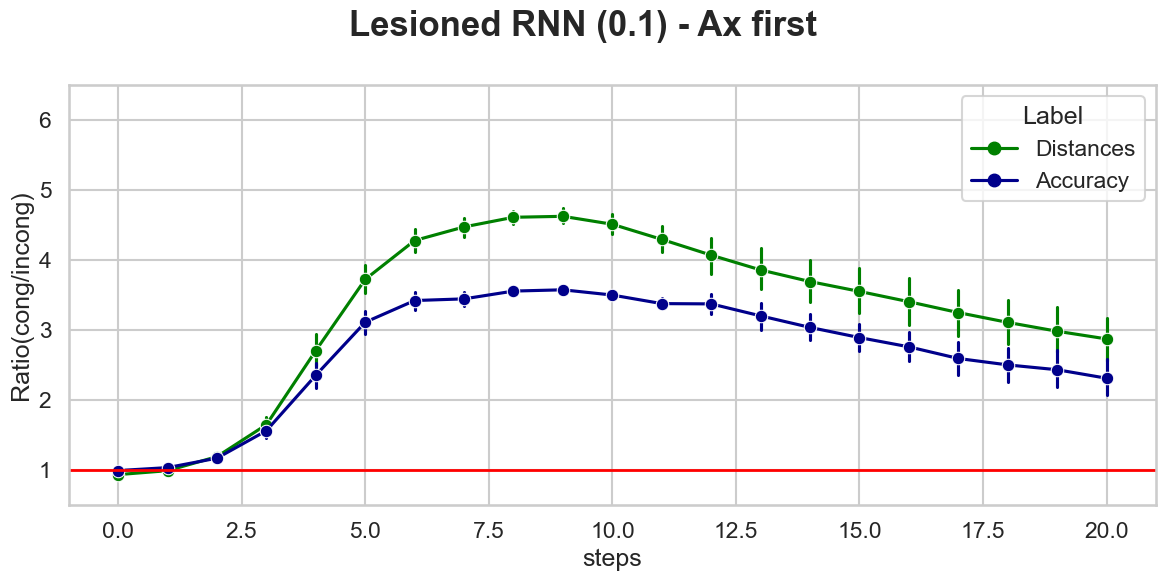

In [7]:
r_res = all_res['ratio_hidds_rnnlesion01_ctxF']
acc_res = all_res['rnnlesion01_acc_runs_ctxF']

args_dict['Label']='Distances'
df_r = res_to_df(args_dict, r_res)

args_dict['Label']='Accuracy'
a_c_tr, a_inc_tr, _, _, _, _ = get_accs(acc_res)
r_tr = a_c_tr / a_inc_tr # ration of accs
df_r_a_tr = res_to_df(args_dict, r_tr)
dfs = df_r, df_r_a_tr

# plot params
args_dict['ctx_order'], args_dict['ctx_order_str'] = 'first', 'ctxF'
args_dict['model_str'], args_dict['mfig_str'] = 'Lesioned RNN (0.1)', 'rnnlesion01'

# plot
fig, ax = plt.subplots(figsize=(figx,figy))
boxplot_ratio_accs(dfs, args_dict, fig, ax)

# only plot the boxplot

# fig, ax = plt.subplots(figsize=(figx,figy))
# boxplot(df_r, args_dict, fig, ax)


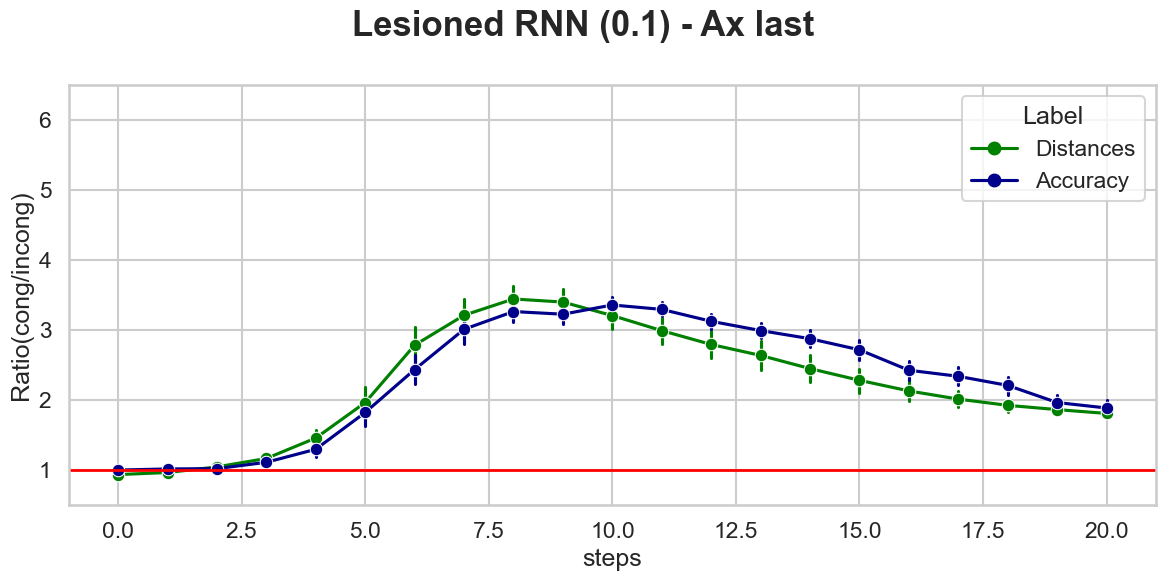

In [8]:
r_res = all_res['ratio_hidds_rnnlesion01_ctxL']
acc_res = all_res['rnnlesion01_acc_runs_ctxL']

args_dict['Label']='Distances'
df_r = res_to_df(args_dict, r_res)

args_dict['Label']='Accuracy'
a_c_tr, a_inc_tr, _, _, _, _ = get_accs(acc_res)
r_tr = a_c_tr / a_inc_tr # ration of accs
df_r_a_tr = res_to_df(args_dict, r_tr)
dfs = df_r, df_r_a_tr

# plot params
args_dict['ctx_order'], args_dict['ctx_order_str'] = 'last', 'ctxL'
args_dict['model_str'], args_dict['mfig_str'] = 'Lesioned RNN (0.1)', 'rnnlesion01'

# plot
fig, ax = plt.subplots(figsize=(figx,figy))
boxplot_ratio_accs(dfs, args_dict, fig, ax)

# only plot the boxplot

# fig, ax = plt.subplots(figsize=(figx,figy))
# boxplot(df_r, args_dict, fig, ax)


# MLP

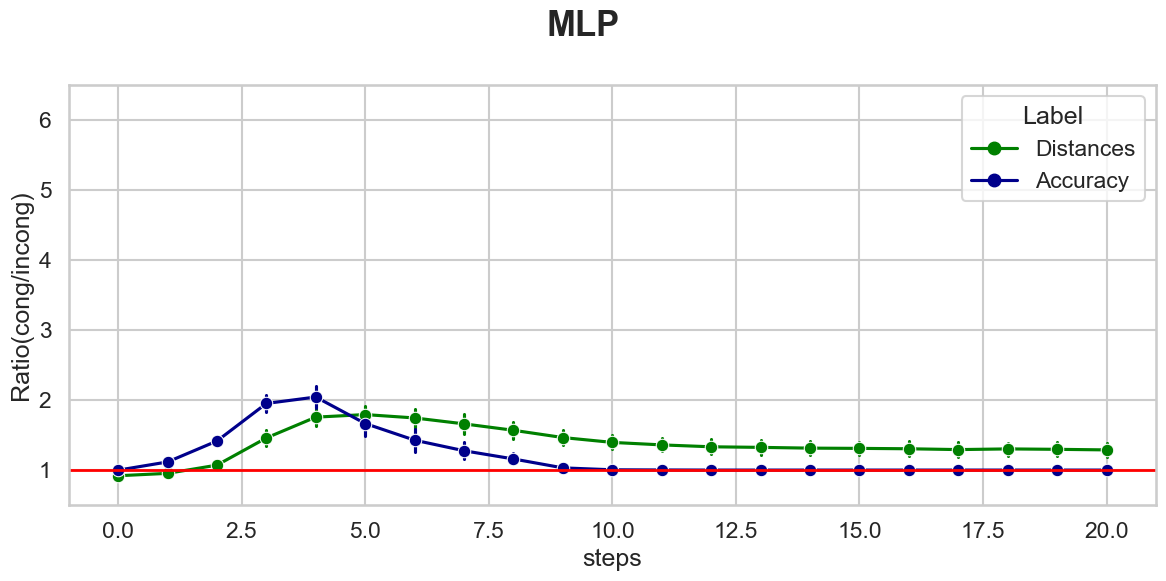

In [9]:
r_res = all_res['ratio_hidds_mlp']
acc_res = all_res['mlp_acc_runs']

args_dict['Label']='Distances'
df_r = res_to_df(args_dict, r_res)

args_dict['Label']='Accuracy'
a_c_tr, a_inc_tr, _, _, _, _ = get_accs(acc_res)
r_tr = a_c_tr / a_inc_tr # ration of accs
df_r_a_tr = res_to_df(args_dict, r_tr)
dfs = df_r, df_r_a_tr

# plot params
args_dict['ctx_order'], args_dict['ctx_order_str'] = None, None
args_dict['model_str'], args_dict['mfig_str'] = 'MLP', 'mlp'

# plot
fig, ax = plt.subplots(figsize=(figx,figy))
boxplot_ratio_accs(dfs, args_dict, fig, ax)

# only plot the boxplot

# fig, ax = plt.subplots(figsize=(figx,figy))
# boxplot(df_r, args_dict, fig, ax)

# Lesioned MLP

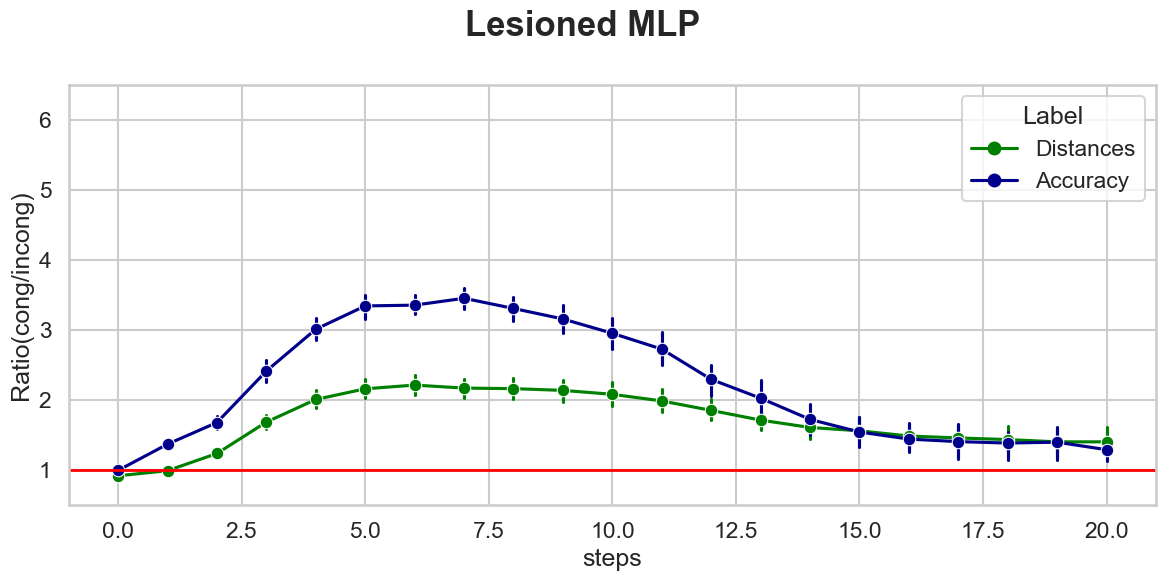

In [10]:
r_res = all_res['ratio_hidds_mlplesion01']
acc_res = all_res['mlplesion01_acc_runs']

args_dict['Label']='Distances'
df_r = res_to_df(args_dict, r_res)

args_dict['Label']='Accuracy'
a_c_tr, a_inc_tr, _, _, _, _ = get_accs(acc_res)
r_tr = a_c_tr / a_inc_tr # ration of accs
df_r_a_tr = res_to_df(args_dict, r_tr)
dfs = df_r, df_r_a_tr

# plot params
args_dict['ctx_order'], args_dict['ctx_order_str'] = None, None
args_dict['model_str'], args_dict['mfig_str'] = 'Lesioned MLP', 'mlplesion01'

# plot
fig, ax = plt.subplots(figsize=(figx,figy))
boxplot_ratio_accs(dfs, args_dict, fig, ax)

# only plot the boxplot

# fig, ax = plt.subplots(figsize=(figx,figy))
# boxplot(df_r, args_dict, fig, ax)

# Stepwise MLP

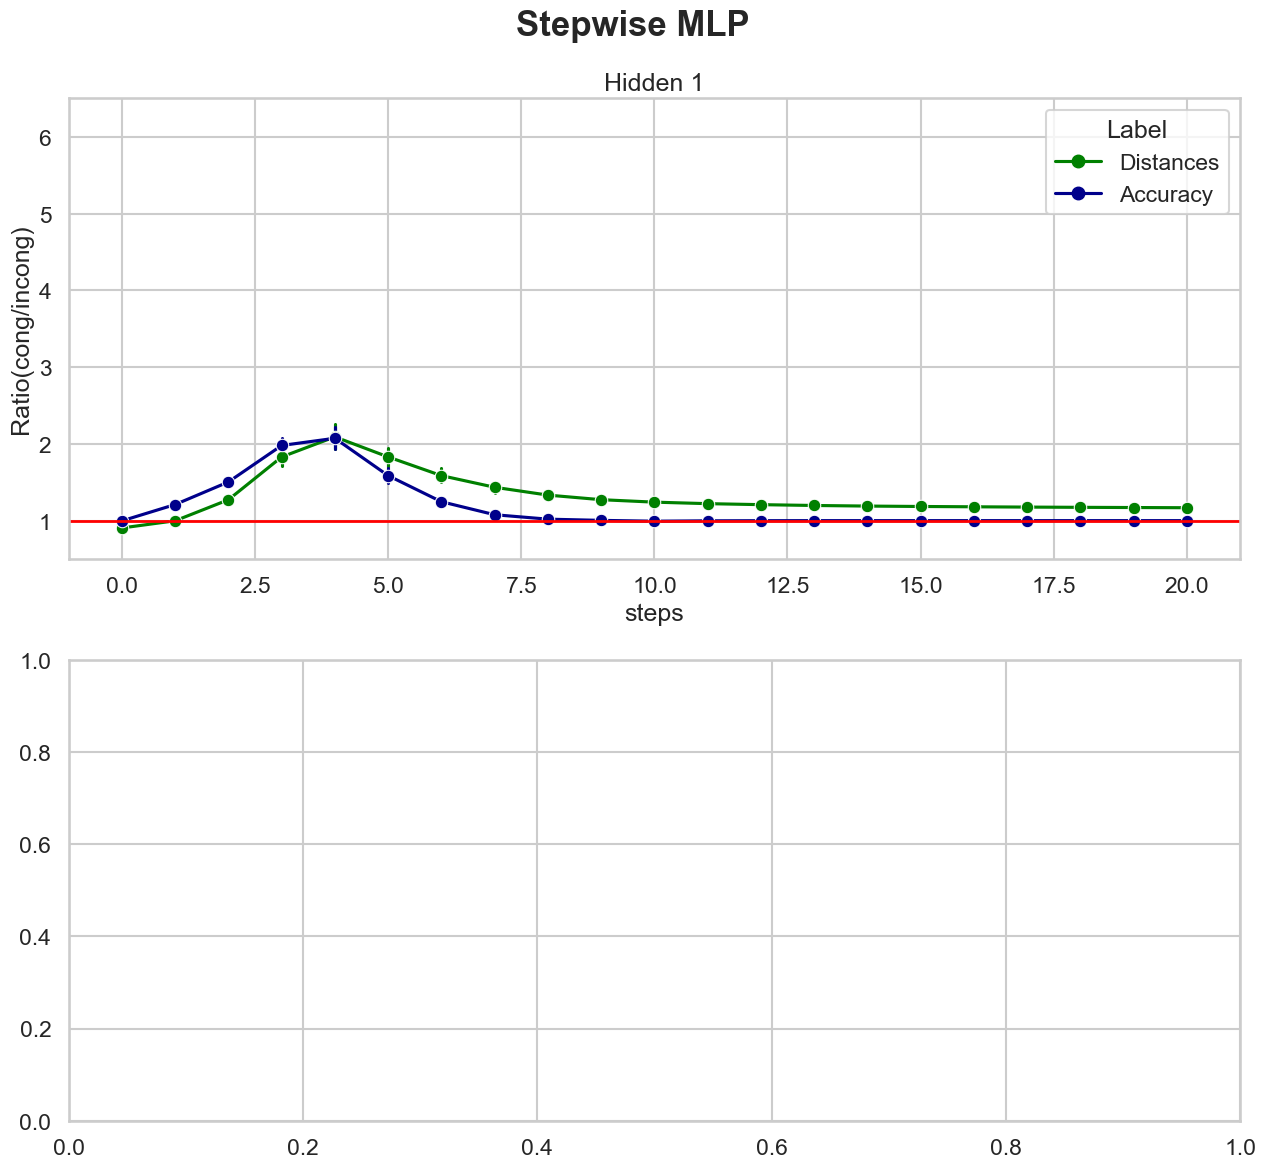

<Figure size 640x480 with 0 Axes>

In [11]:
r_res = all_res['ratio_hidds_stepwisemlp']
acc_res = all_res['stepwisemlp_acc_runs']

# plot params
args_dict['ctx_order'], args_dict['ctx_order_str'] = None, None
args_dict['model_str'], args_dict['mfig_str'] = 'Stepwise MLP', 'swmlp'

# plot
fig, axs = plt.subplots(2, 1, figsize=(13,12))

# Hidden 1
args_dict['Label']='Distances'
df_r = res_to_df(args_dict, r_res[:,:,0])

args_dict['Label']='Accuracy'
a_c_tr, a_inc_tr, _, _, _, _ = get_accs(acc_res)
r_tr = a_c_tr / a_inc_tr # ration of accs
df_r_a_tr = res_to_df(args_dict, r_tr)
dfs = df_r, df_r_a_tr

ax = axs[0]
args_dict['sub_title'] = 'Hidden 1'
boxplot_ratio_accs(dfs, args_dict, fig, ax)

# only plot the boxplot
# fig, ax = plt.subplots(figsize=(figx,figy))
# boxplot(df_r, args_dict, fig, ax)

# Hidden 2
args_dict['Label']='Distances'
df_r = res_to_df(args_dict, r_res[:,:,1])

ax = axs[1]
args_dict['sub_title'] = 'Hidden 2'
boxplot_ratio_accs(dfs, args_dict, fig, ax)
# only plot the boxplot
# fig, ax = plt.subplots(figsize=(figx,figy))
# boxplot(df_r, args_dict, fig, ax)

# change this to default for the remaining plots
args_dict['sub_title'] = ''

# Cognitive Controller

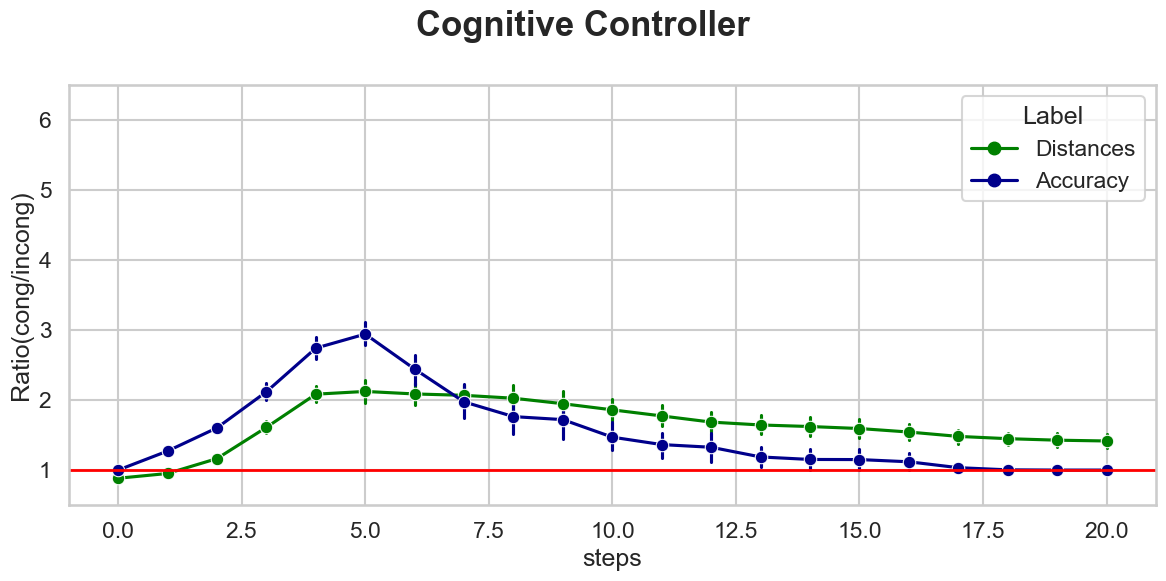

In [12]:
r_res = all_res['ratio_hidds_mlp_cc']
acc_res = all_res['mlp_cc_acc_runs']

args_dict['Label']='Distances'
df_r = res_to_df(args_dict, r_res)

args_dict['Label']='Accuracy'
a_c_tr, a_inc_tr, _, _, _, _ = get_accs(acc_res)
r_tr = a_c_tr / a_inc_tr # ration of accs
df_r_a_tr = res_to_df(args_dict, r_tr)
dfs = df_r, df_r_a_tr

# plot params
args_dict['ctx_order'], args_dict['ctx_order_str'] = None, None
args_dict['model_str'], args_dict['mfig_str'] = 'Cognitive Controller', 'mlpcc'

# plot
fig, ax = plt.subplots(figsize=(figx,figy))
boxplot_ratio_accs(dfs, args_dict, fig, ax)

# only plot the boxplot
# fig, ax = plt.subplots(figsize=(figx,figy))
# boxplot(df_r, args_dict, fig, ax)

# RNNCell 

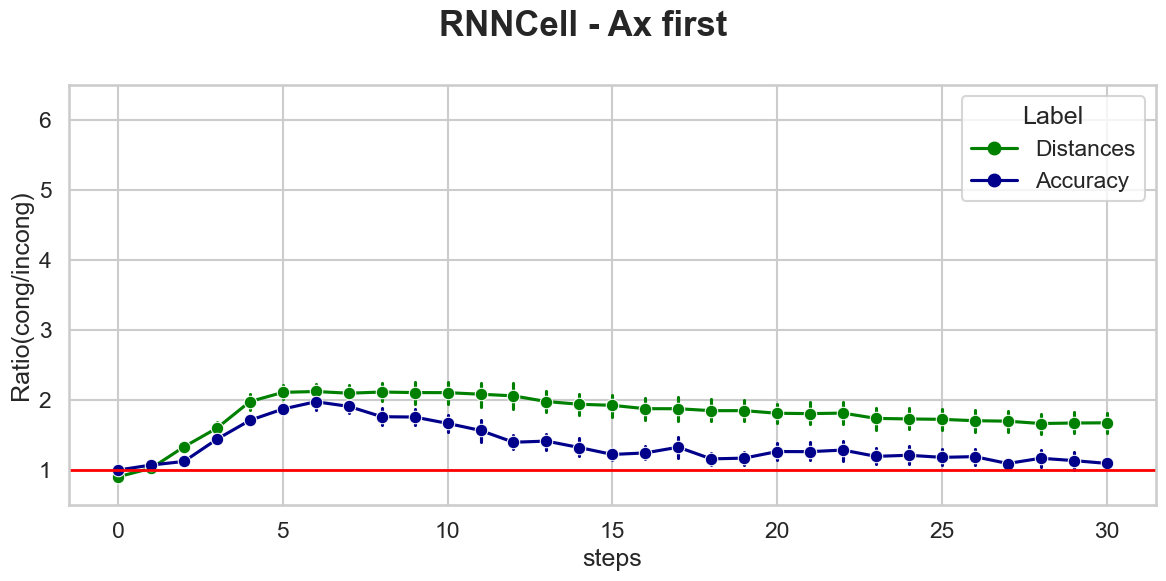

In [13]:
r_res = all_res['ratio_hidds_rnncell_ctxF']
acc_res = all_res['rnncell_acc_runs_ctxF']

args_dict['Label']='Distances'
df_r = res_to_df(args_dict, r_res)

args_dict['Label']='Accuracy'
a_c_tr, a_inc_tr, _, _, _, _ = get_accs(acc_res)
r_tr = a_c_tr / a_inc_tr # ration of accs
df_r_a_tr = res_to_df(args_dict, r_tr)
dfs = df_r, df_r_a_tr

# plot params
args_dict['ctx_order'], args_dict['ctx_order_str'] = 'first', 'ctxF'
args_dict['model_str'], args_dict['mfig_str'] = 'RNNCell', 'rnncell'

# plot
fig, ax = plt.subplots(figsize=(figx,figy))
boxplot_ratio_accs(dfs, args_dict, fig, ax)

# only plot the boxplot

# fig, ax = plt.subplots(figsize=(figx,figy))
# boxplot(df_r, args_dict, fig, ax)

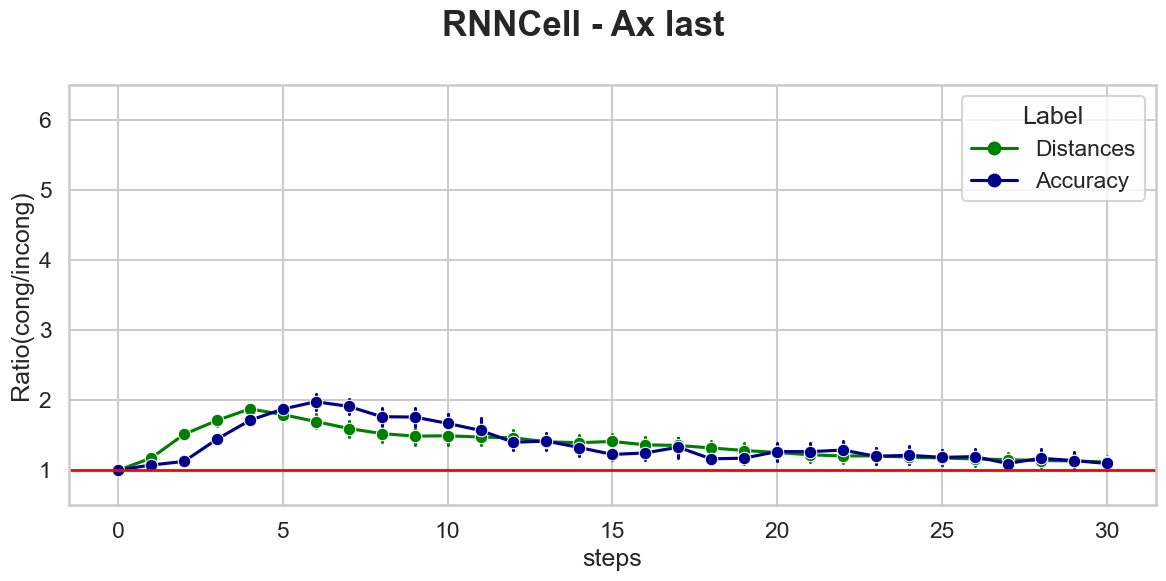

In [14]:
r_res = all_res['ratio_hidds_rnncell_ctxL']
acc_res = all_res['rnncell_acc_runs_ctxL']

args_dict['Label']='Distances'
df_r = res_to_df(args_dict, r_res)

args_dict['Label']='Accuracy'
a_c_tr, a_inc_tr, _, _, _, _ = get_accs(acc_res)
r_tr = a_c_tr / a_inc_tr # ration of accs
df_r_a_tr = res_to_df(args_dict, r_tr)
dfs = df_r, df_r_a_tr

# plot params
args_dict['ctx_order'], args_dict['ctx_order_str'] = 'last', 'ctxL'
args_dict['model_str'], args_dict['mfig_str'] = 'RNNCell', 'rnncell'

# plot
fig, ax = plt.subplots(figsize=(figx,figy))
boxplot_ratio_accs(dfs, args_dict, fig, ax)

# only plot the boxplot

# fig, ax = plt.subplots(figsize=(figx,figy))
# boxplot(df_r, args_dict, fig, ax)

# RNN Balanced

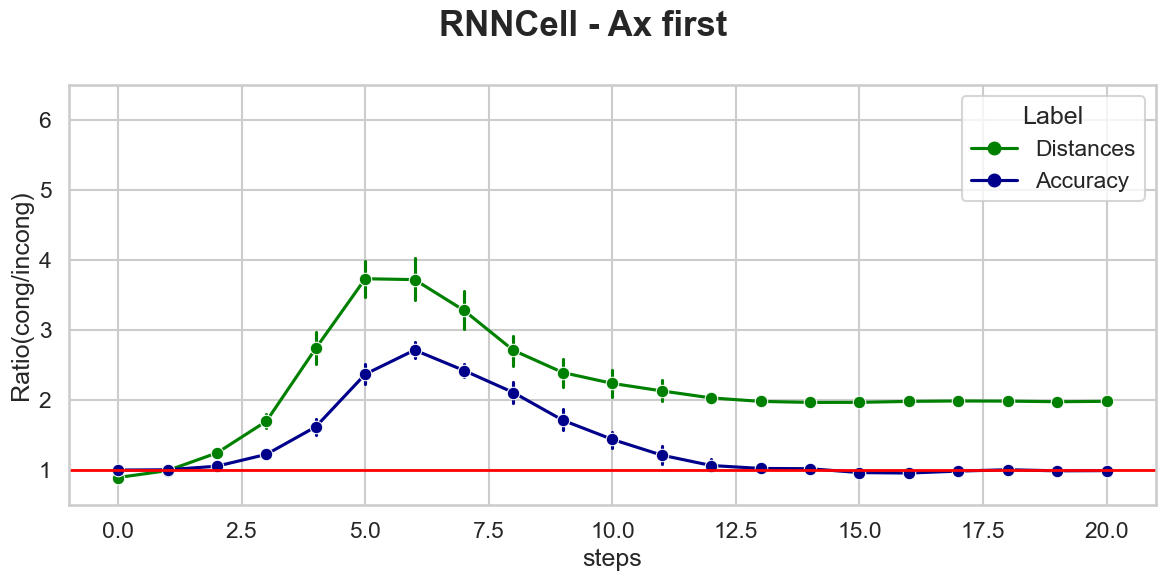

In [15]:
r_res = all_res['ratio_hidds_rnn_balanced_ctxF']
acc_res = all_res['rnn_balanced_acc_runs_ctxF']

args_dict['Label']='Distances'
df_r = res_to_df(args_dict, r_res)

args_dict['Label']='Accuracy'
a_c_tr, a_inc_tr, _, _, _, _ = get_accs(acc_res)
r_tr = a_c_tr / a_inc_tr # ration of accs
df_r_a_tr = res_to_df(args_dict, r_tr)
dfs = df_r, df_r_a_tr

# plot params
args_dict['ctx_order'], args_dict['ctx_order_str'] = 'first', 'ctxF'
args_dict['model_str'], args_dict['mfig_str'] = 'RNNCell', 'rnncell'

# plot
fig, ax = plt.subplots(figsize=(figx,figy))
boxplot_ratio_accs(dfs, args_dict, fig, ax)

# only plot the boxplot

# fig, ax = plt.subplots(figsize=(figx,figy))
# boxplot(df_r, args_dict, fig, ax)

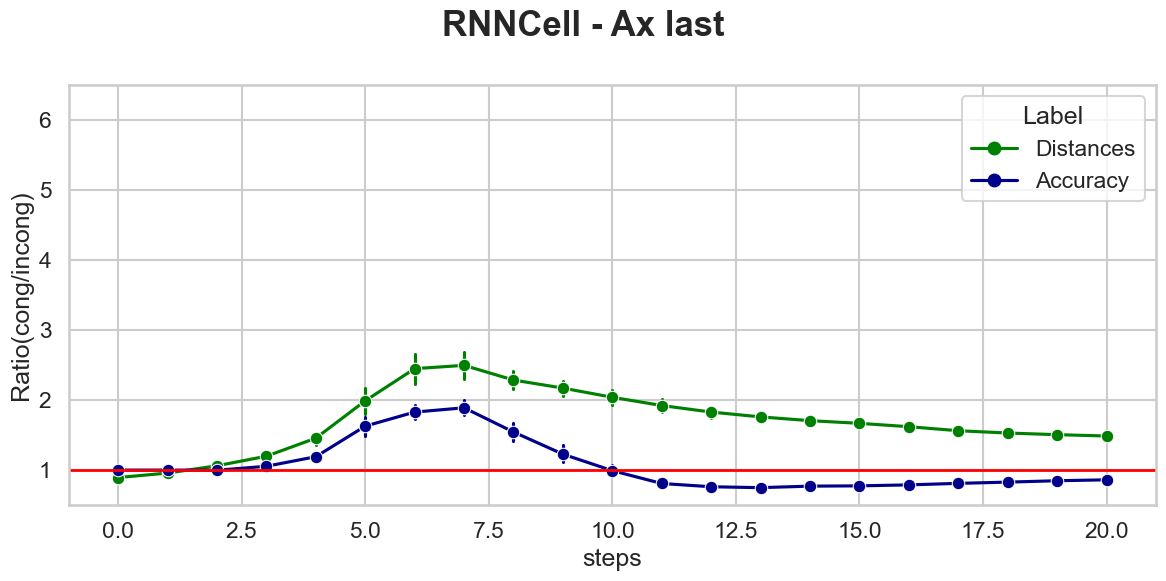

In [16]:
r_res = all_res['ratio_hidds_rnn_balanced_ctxL']
acc_res = all_res['rnn_balanced_acc_runs_ctxL']

args_dict['Label']='Distances'
df_r = res_to_df(args_dict, r_res)

args_dict['Label']='Accuracy'
a_c_tr, a_inc_tr, _, _, _, _ = get_accs(acc_res)
r_tr = a_c_tr / a_inc_tr # ration of accs
df_r_a_tr = res_to_df(args_dict, r_tr)
dfs = df_r, df_r_a_tr

# plot params
args_dict['ctx_order'], args_dict['ctx_order_str'] = 'last', 'ctxL'
args_dict['model_str'], args_dict['mfig_str'] = 'RNNCell', 'rnncell'

# plot
fig, ax = plt.subplots(figsize=(figx,figy))
boxplot_ratio_accs(dfs, args_dict, fig, ax)

# only plot the boxplot

# fig, ax = plt.subplots(figsize=(figx,figy))
# boxplot(df_r, args_dict, fig, ax)